# Credit Card Fraud Detection

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
dir = '/content/drive/MyDrive/Encryptix/Credit Card Fraud Dataset'
os.chdir(dir)
print(os.getcwd())
print(os.listdir())

/content/drive/MyDrive/Encryptix/Credit Card Fraud Dataset
['fraudTest.csv', 'fraudTrain.csv']


### Data Preparation

In [26]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

no null values in data

In [29]:
np.bincount(train_data['is_fraud'])

array([1289169,    7506])

### Distribution of Target Class

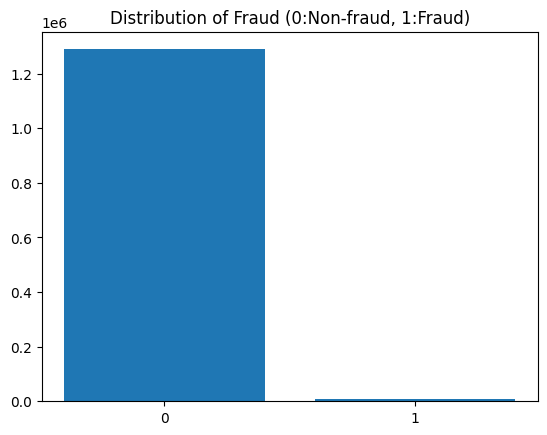

In [30]:
plt.bar([0,1],np.bincount(train_data['is_fraud']))
plt.title('Distribution of Fraud (0:Non-fraud, 1:Fraud)')
plt.xticks([0, 1])
plt.show()

The class imbalance is evident, with 1,289,169 samples labeled as class 0 (non-fraud) and only 7,506 samples labeled as class 1 (fraud).

In [31]:
train_data.nunique() # no of unique values in each column

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [32]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Data Analysis

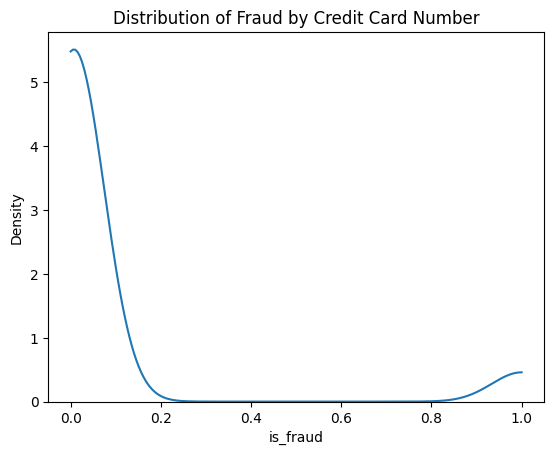

In [33]:
d = train_data.groupby(by='cc_num')['is_fraud']
sns.kdeplot(d.sum()/d.count(),clip=(0,1))
plt.title('Distribution of Fraud by Credit Card Number')
plt.show()

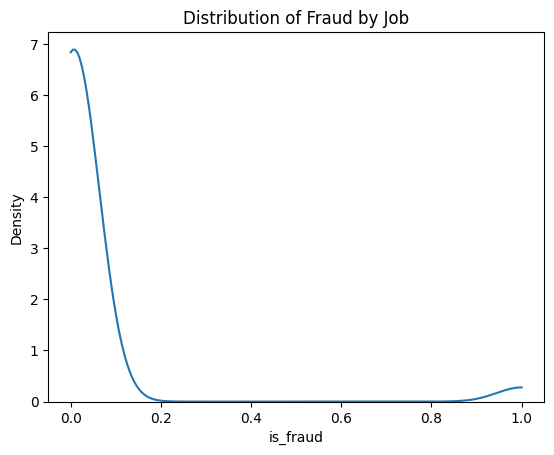

In [34]:
d = train_data.groupby(by='job')['is_fraud']
plt.title('Distribution of Fraud by Job')
sns.kdeplot(d.sum()/d.count(),clip=(0,1))
plt.show()

The plots above shows the probability of a group of customers (grouped by credit card number and job) being fraudulent (i.e., class 1). From the distribution, we can see that almost all customers fall within the range of 0-0.2 or 0.8-1. This indicates that a particular customer either committed mostly fraud transactions or mostly non-fraud transactions, suggesting that the credit card number (cc_number) and job are important columns for our analysis.

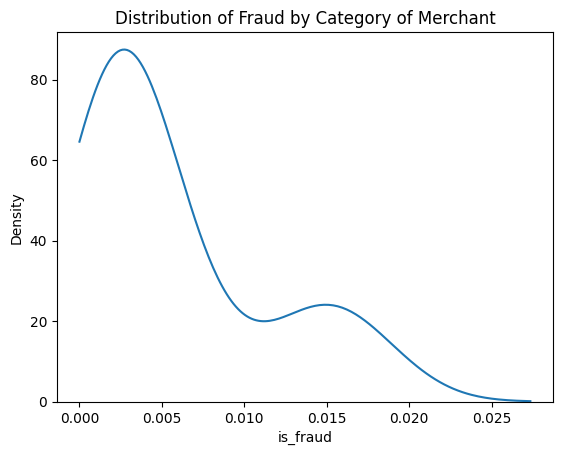

In [35]:
d = train_data.groupby(by='category')['is_fraud']
sns.kdeplot(d.sum()/d.count(),clip=(0,1))
plt.title('Distribution of Fraud by Category of Merchant')
plt.show()

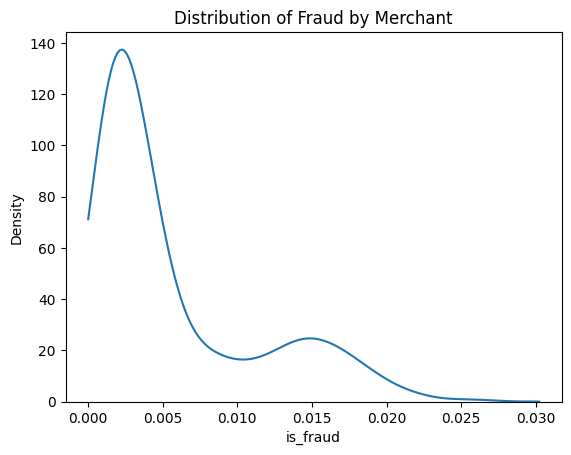

In [36]:
d = train_data.groupby(by='merchant')['is_fraud']
sns.kdeplot(d.sum()/d.count(),clip=(0,1))
plt.title('Distribution of Fraud by Merchant')
plt.show()

The plots above display the probability of customers (grouped by merchants and their categories) being fraudulent (class 1). From the distribution, it's evident that nearly all customers fall within the range of 0-0.03. This suggests that these two columns have little to no value for our model.

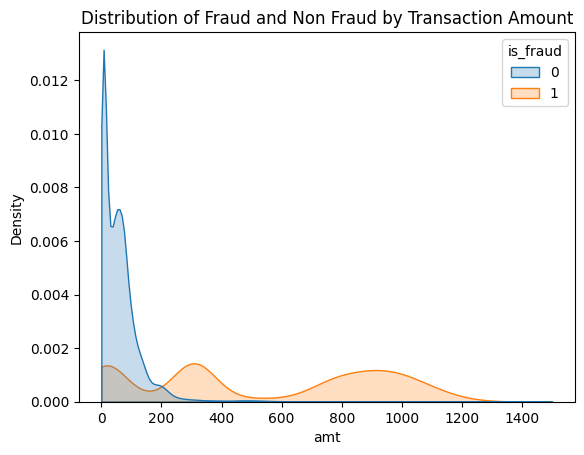

In [37]:
sns.kdeplot(
   data=train_data, x="amt", hue="is_fraud",
   fill=True, common_norm=False,clip=(0,1500)
)
plt.title('Distribution of Fraud and Non Fraud by Transaction Amount')
plt.show()

The plot above illustrates the distribution of fraud and non-fraud transactions by transaction amount. It is evident that most transactions with low amounts are non-fraudulent, while a majority of transactions with large amounts are fraudulent.

In [38]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Feature Extraction

In [39]:
# Using only useful columns for classification task
useful_columns = ['cc_num','amt','gender','street','city','state','zip','job','is_fraud']
train_data = train_data[useful_columns]
test_data = test_data[useful_columns]

In [40]:
train_data

,cc_num,amt,gender,street,city,state,zip,job,is_fraud
0,2703186189652095,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,"Psychologist, counselling",0
1,630423337322,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,Special educational needs teacher,0
2,38859492057661,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,Nature conservation officer,0
3,3534093764340240,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,Patent attorney,0
4,375534208663984,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,Geoscientist,0
1296671,6011149206456997,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,"Production assistant, television",0
1296672,3514865930894695,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,Naval architect,0
1296673,2720012583106919,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,Volunteer coordinator,0


### Label Encoding

In [41]:
# label_encoding the columns with distinct values
def label_encoding(columns,train_data,test_data):
  for col in columns:
    encoder = OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=-1, dtype=int)
    train_data[col] = encoder.fit_transform(np.array(train_data[col]).reshape(-1,1))
    test_data[col] = encoder.transform(np.array(test_data[col]).reshape(-1,1))
  return train_data,test_data

In [ ]:
train_data,test_data = label_encoding(['gender','street','city','state','zip','job'],train_data,test_data)

### Undersampling

In [43]:
fraud_data = train_data[train_data['is_fraud']==1]
non_fraud_data = train_data[train_data['is_fraud']==0]

In [44]:
n = fraud_data.shape[0]
train_data = pd.concat([non_fraud_data.sample(n),fraud_data])

Since we have a class imbalance issue where class 0 samples outnumber class 1 samples by approximately 170 times, I performed undersampling by reducing the number of class 0 samples to match the number of class 1 samples.

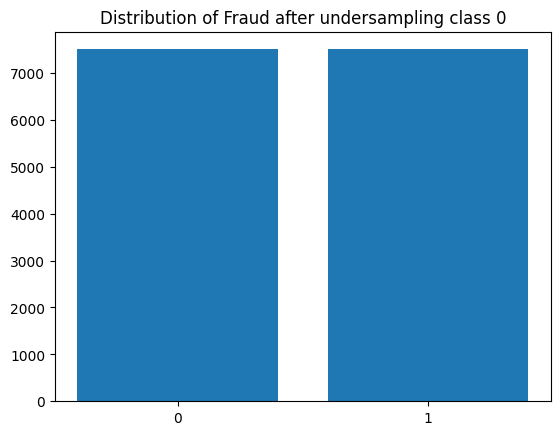

In [45]:
plt.bar([0,1],np.bincount(train_data['is_fraud']))
plt.title(f'Distribution of Fraud after undersampling class 0' )
plt.xticks([0, 1])
plt.show()

In [46]:
train_data.shape

(15012, 9)

### Training Model (Random Forest)

In [47]:
clf = RandomForestClassifier(n_estimators=400, random_state=42)
clf.fit(train_data.drop('is_fraud',axis=1),train_data['is_fraud'])

RandomForestClassifier(n_estimators=400, random_state=42)

In [48]:
predictions = clf.predict(test_data.drop('is_fraud',axis=1))

### Classification Report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_data['is_fraud'],predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.74      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.82      0.50    555719
weighted avg       1.00      0.90      0.94    555719



In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data['is_fraud'],predictions)

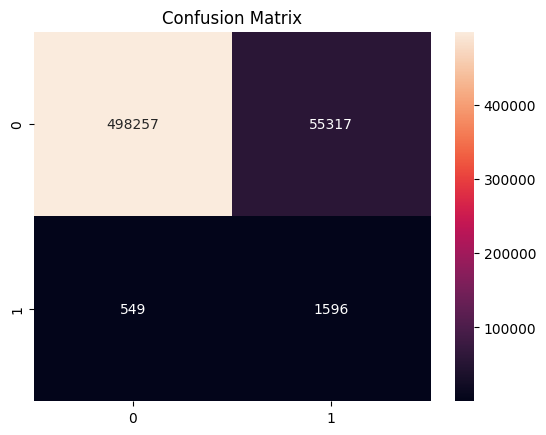

In [51]:
sns.heatmap(cm, annot=True,fmt='.0f')
plt.title('Confusion Matrix')
plt.show()